In [1]:
s = open("input.txt") do f 
    [chomp(x) for x in readlines(f)]
end

322-element Array{SubString{String},1}:
 "position=<-42346,  10806> velocity=< 4, -1>"
 "position=<-31708, -21106> velocity=< 3,  2>"
 "position=<-10445, -10472> velocity=< 1,  1>"
 "position=<-21064, -42388> velocity=< 2,  4>"
 "position=< 53393,  32093> velocity=<-5, -3>"
 "position=<-52992,  10809> velocity=< 5, -1>"
 "position=<-52965,  42724> velocity=< 5, -4>"
 "position=<-42326, -10464> velocity=< 4,  1>"
 "position=< 10872, -31750> velocity=<-1,  3>"
 "position=<-10433, -42381> velocity=< 1,  4>"
 "position=< 32115, -42384> velocity=<-3,  4>"
 "position=< 21496, -42389> velocity=<-2,  4>"
 "position=< 53378,  21454> velocity=<-5, -2>"
 ⋮                                            
 "position=<-21096, -53024> velocity=< 2,  5>"
 "position=<-42342, -10470> velocity=< 4,  1>"
 "position=<-31706,  53367> velocity=< 3, -5>"
 "position=< 42779, -10470> velocity=<-4,  1>"
 "position=< 42789, -42389> velocity=<-4,  4>"
 "position=< 53398,  32085> velocity=<-5, -3>"
 "position=<-42355, 

In [11]:
pat = r"<\s*([-\d]+),\s*([-\d]+)>.*<\s*([-\d]+),\s*([-\d]+)>"

r"<\s*([-\d]+),\s*([-\d]+)>.*<\s*([-\d]+),\s*([-\d]+)>"

In [14]:
[parse(Int,s[1][i]) for i in 1:4]

ArgumentError: ArgumentError: invalid base 10 digit 'p'

In [17]:
a = [[parse(Int,match(pat,x)[i]) for i in 1:4] for x in s]

322-element Array{Array{Int64,1},1}:
 [-42346, 10806, 4, -1]
 [-31708, -21106, 3, 2]
 [-10445, -10472, 1, 1]
 [-21064, -42388, 2, 4]
 [53393, 32093, -5, -3]
 [-52992, 10809, 5, -1]
 [-52965, 42724, 5, -4]
 [-42326, -10464, 4, 1]
 [10872, -31750, -1, 3]
 [-10433, -42381, 1, 4]
 [32115, -42384, -3, 4]
 [21496, -42389, -2, 4]
 [53378, 21454, -5, -2]
 ⋮                     
 [-21096, -53024, 2, 5]
 [-42342, -10470, 4, 1]
 [-31706, 53367, 3, -5]
 [42779, -10470, -4, 1]
 [42789, -42389, -4, 4]
 [53398, 32085, -5, -3]
 [-42355, 53366, 4, -5]
 [10869, 10810, -1, -1]
 [32147, 53368, -3, -5]
 [-31708, -21106, 3, 2]
 [53409, 32093, -5, -3]
 [21492, 42728, -2, -4]

In [19]:
p = [x[j] for x in a, j in 1:2]

322×2 Array{Int64,2}:
 -42346   10806
 -31708  -21106
 -10445  -10472
 -21064  -42388
  53393   32093
 -52992   10809
 -52965   42724
 -42326  -10464
  10872  -31750
 -10433  -42381
  32115  -42384
  21496  -42389
  53378   21454
      ⋮        
 -21096  -53024
 -42342  -10470
 -31706   53367
  42779  -10470
  42789  -42389
  53398   32085
 -42355   53366
  10869   10810
  32147   53368
 -31708  -21106
  53409   32093
  21492   42728

In [21]:
v = [x[j] for x in a, j in 3:4]

322×2 Array{Int64,2}:
  4  -1
  3   2
  1   1
  2   4
 -5  -3
  5  -1
  5  -4
  4   1
 -1   3
  1   4
 -3   4
 -2   4
 -5  -2
  ⋮    
  2   5
  4   1
  3  -5
 -4   1
 -4   4
 -5  -3
  4  -5
 -1  -1
 -3  -5
  3   2
 -5  -3
 -2  -4

In [25]:
function rr(t)
    global p,v
    pos = p + t*v
    Mx = maximum(pos[:,1])
    My = maximum(pos[:,2])
    mx = minimum(pos[:,1])
    my = minimum(pos[:,2])
    return (Mx-mx,My-my)
end

rr (generic function with 1 method)

In [64]:
size(B)

(322, 2)

In [65]:
m = 213000
T = 1
for t in 1:100000
    ss = sum(rr(t))
    if ss < m
        m = ss
        T = t
    end
end
        
    

In [67]:
m,T

(70, 10639)

In [68]:
B = p + T * v

322×2 Array{Int64,2}:
 210  167
 209  172
 194  167
 214  168
 198  176
 203  170
 230  168
 230  175
 233  167
 206  175
 198  172
 218  167
 183  176
   ⋮     
 182  171
 214  169
 211  172
 223  169
 233  167
 203  168
 201  171
 230  171
 230  173
 209  172
 214  176
 214  172

In [30]:
using Images

┌ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1189


In [90]:
minimum(B[:,1]),minimum(B[:,2])

(182, 167)

In [82]:
b = Set([Tuple(B[i,:] - [181,166]) for i in 1:322])

Set(Tuple{Int64,Int64}[(35, 1), (11, 1), (28, 10), (49, 2), (22, 2), (54, 2), (1, 10), (9, 9), (33, 6), (28, 6)  …  (10, 1), (1, 9), (25, 2), (20, 1), (42, 7), (3, 10), (54, 7), (51, 1), (62, 10), (45, 7), (54, 8)])

In [84]:
for i in 1:20
    for j in 1:70
        print( (j,i) in b ? "#" : " ")
    end
    print("\n")
end

#        ####   #####    ####   #####   #    #   ####   #             
#       #    #  #    #  #    #  #    #  #    #  #    #  #             
#       #       #    #  #       #    #   #  #   #       #             
#       #       #    #  #       #    #   #  #   #       #             
#       #       #####   #       #####     ##    #       #             
#       #       #       #  ###  #         ##    #  ###  #             
#       #       #       #    #  #        #  #   #    #  #             
#       #       #       #    #  #        #  #   #    #  #             
#       #    #  #       #   ##  #       #    #  #   ##  #             
######   ####   #        ### #  #       #    #   ### #  ######        
                                                                      
                                                                      
                                                                      
                                                                      
      

In [87]:
img = ones(Int,20,70)
for i in 1:20
    for j in 1:70
        img[i,j] = (j,i) in b ? 0 : 1
    end
end

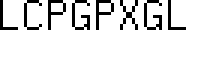

In [88]:
Gray.(img)

In [89]:
T

10639